<h1>ML Data Cleaning and Feature Selection</h1>

About Dataset
Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats

ML Data Cleaning and Feature Selection

* What are the data types? (Only numeric and categorical) -- done

* Are there missing values? -- done

* What are the likely distributions of the numeric variables? -- done

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods) -- in progress

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



In [50]:
url = "https://raw.githubusercontent.com/midhunmohank/DS/master/Datasets/AB_NYC_2019.csv"
df = pd.read_csv(url)

In [51]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h3>Dropping the following customer data sensitive features:</h3>
<l>
<li>id</li>
<li>name</li>
<li>host_id</li>
<li>host_name</li>
<li>last_review</li>
</l>

In [52]:
df.drop(["id","name","host_id","host_name","last_review"],axis=1,inplace= True)

In [26]:
#Checking changes
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h3> What are the data types? (Only numeric and categorical) </h3>

In [53]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The dataset has <b>4</b> Categorical and <b>8</b> Numerical Features.

<h3>Are there missing values?</h3>

Yes, the dataset currently in use has missing values

In [54]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Mapping Categorical variables with index using cat.codes

In [56]:
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int16(1), int64(5), int8(2)
memory usage: 3.2 MB


<h3>What are the likely distributions of the numeric variables? </h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

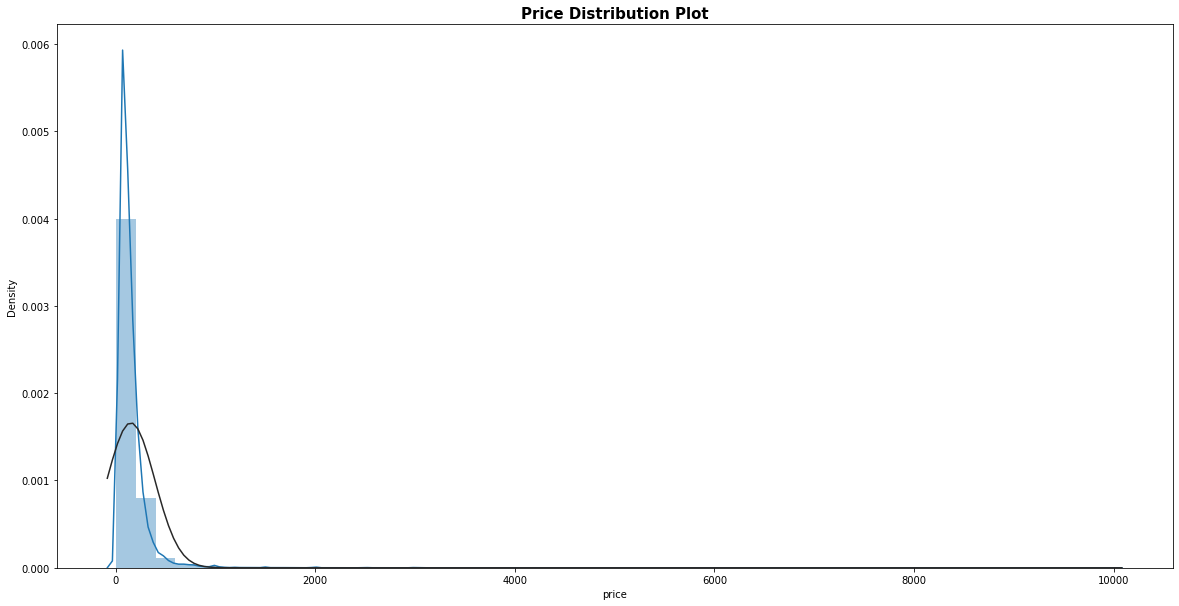

In [57]:
#Distribution of Price

plt.figure(figsize=(20,10))
sns.distplot(df['price'], fit = norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [65]:
dfColumnList = df.columns 
# dfColumnList = [dfColumnList.drop(i) for i in dfColumnList if np.dtype== ]


AttributeError: ignored

<Figure size 720x720 with 0 Axes>

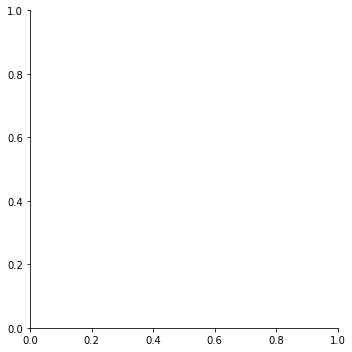

In [69]:
for i in dfColumnList:
  plt.figure(figsize= (10,10))
  sns.displot(df[i], fit = norm)
  plt.title(f"Distribution of {i}",size = 15, weight = "bold")

In [30]:
df['price_log'] = np.log(df.price+1)

In [70]:
plt.figure(figsize=(12,10))
sns.displot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

KeyError: ignored

<Figure size 864x720 with 0 Axes>

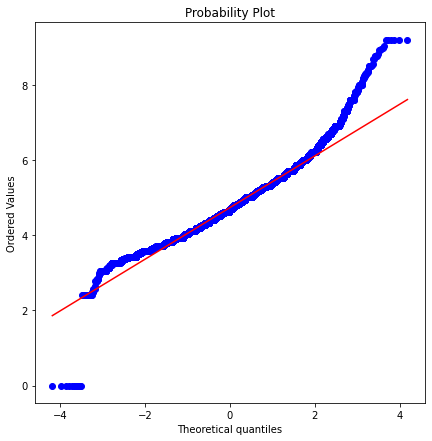

In [32]:
plt.figure(figsize=(7,7))
stats.probplot(df['price_log'], plot=plt)
plt.show()